In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib

In [7]:
df = yf.download('BTC-USD', start='2015-01-01')

[*********************100%***********************]  1 of 1 completed


In [8]:
df['ret'] = df.Close.pct_change()
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,ret
Date,,,,,,,
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,0.002492
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,-0.107767
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,-0.060079
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,0.038907
2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700,0.042682
...,...,...,...,...,...,...,...
2024-09-09,54851.886719,58041.125000,54598.433594,57019.535156,57019.535156,34618096173,0.039714
2024-09-10,57020.097656,58029.976562,56419.414062,57648.710938,57648.710938,28857630507,0.011034
2024-09-11,57650.289062,57991.320312,55567.339844,57343.171875,57343.171875,37049062672,-0.005300


In [12]:
low_thresh = np.percentile(df.ret, 10)
high_thresh = np.percentile(df.ret, 90)

In [16]:
df['signal'] = np.where(df.ret <= low_thresh, 1, np.where(df.ret >= high_thresh, -1, 0))
df

C:\Users\darem\AppData\Local\Temp\ipykernel_10052\1971295728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal'] = np.where(df.ret <= low_thresh, 1, np.where(df.ret >= high_thresh, -1, 0))


,Open,High,Low,Close,Adj Close,Volume,ret,signal
Date,,,,,,,,
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,0.002492,0
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,-0.107767,1
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,-0.060079,1
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,0.038907,0
2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700,0.042682,-1
...,...,...,...,...,...,...,...,...
2024-09-09,54851.886719,58041.125000,54598.433594,57019.535156,57019.535156,34618096173,0.039714,0
2024-09-10,57020.097656,58029.976562,56419.414062,57648.710938,57648.710938,28857630507,0.011034,0
2024-09-11,57650.289062,57991.320312,55567.339844,57343.171875,57343.171875,37049062672,-0.005300,0


In [18]:
df['next_day_ret'] = df.ret.shift(-1)
df

C:\Users\darem\AppData\Local\Temp\ipykernel_10052\4036137141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['next_day_ret'] = df.ret.shift(-1)


,Open,High,Low,Close,Adj Close,Volume,ret,signal,next_day_ret
Date,,,,,,,,,
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650,0.002492,0,-0.107767
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,-0.107767,1,-0.060079
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100,-0.060079,1,0.038907
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800,0.038907,0,0.042682
2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700,0.042682,-1,0.028471
...,...,...,...,...,...,...,...,...,...
2024-09-09,54851.886719,58041.125000,54598.433594,57019.535156,57019.535156,34618096173,0.039714,0,0.011034
2024-09-10,57020.097656,58029.976562,56419.414062,57648.710938,57648.710938,28857630507,0.011034,0,-0.005300
2024-09-11,57650.289062,57991.320312,55567.339844,57343.171875,57343.171875,37049062672,-0.005300,0,0.013669


In [24]:
low_ret_group = df[df.signal == 1]['next_day_ret']
high_ret_group = df[df.signal == -1]['next_day_ret']

In [27]:
low_ret_group.mean()

np.float64(0.0037070791331767525)

In [28]:
high_ret_group.mean()

np.float64(0.002819901074931577)

<Axes: xlabel='Date'>

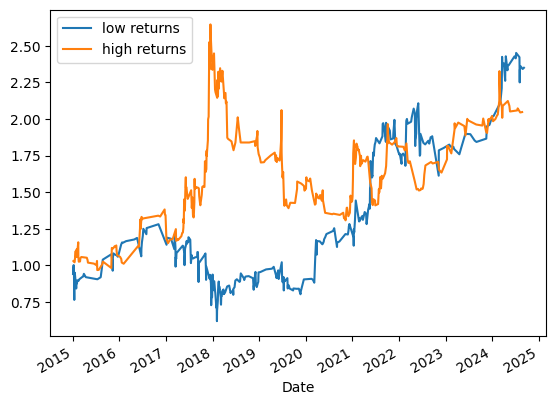

In [34]:
(low_ret_group +1).cumprod().plot(label='low returns', legend=True)
(high_ret_group +1).cumprod().plot(label='high returns', legend=True)